In [86]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import warnings 
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
##number of null values in each features
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['MaritalStatus'].value_counts() 

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df['Designation'].value_counts() 

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [9]:
df['NumberOfFollowups'].value_counts() 

NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

In [10]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [11]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [12]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [13]:
df.head(20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [14]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [15]:
df['MaritalStatus'].value_counts() 

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [16]:
feature_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing value')


Age 4.62357 % missing value
TypeofContact 0.51146 % missing value
DurationOfPitch 5.13502 % missing value
NumberOfFollowups 0.92062 % missing value
PreferredPropertyStar 0.53191 % missing value
NumberOfTrips 2.86416 % missing value
NumberOfChildrenVisiting 1.35025 % missing value
MonthlyIncome 4.76678 % missing value


In [17]:
df[feature_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [18]:







feature_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [19]:
df.Age.fillna(df.Age.median(),inplace=True)

In [20]:
df.TypeofContact.fillna(df['TypeofContact'].value_counts(ascending=False).index[0],inplace=True)

In [21]:
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

In [22]:
df.NumberOfFollowups.fillna(df['NumberOfFollowups'].value_counts(ascending=False).index[0],inplace=True)

In [23]:
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.median(),inplace=True)

In [24]:
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

In [25]:
df.NumberOfChildrenVisiting.fillna(df['NumberOfChildrenVisiting'].value_counts(ascending=False).index[0],inplace=True)

In [26]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [27]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [28]:
df.drop('CustomerID',inplace=True,axis=1)

In [29]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


In [30]:
df['NumberOfFollowups'].value_counts() 

NumberOfFollowups
4.0    2113
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

In [31]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

In [32]:
df['TtotalVisitng']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace =True,axis=1)

In [33]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TtotalVisitng
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [34]:
num_features=[features for features in df.columns 
              if df[features].dtypes !='O']
##num_features = df.select_dtypes(exclude='object').columns.tolist()
print('number of numeric feature:',len(num_features))

number of numeric feature: 12


In [35]:
cat_features=[features for features in df.columns 
              if df[features].dtypes =='O']
###non_numeric_features = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print('number of categorical feature:',len(cat_features))

number of categorical feature: 6


In [36]:
discrete_features=[features for features in num_features
              if len(df[features].unique())<=25]
###non_numeric_features = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print('number of discrete:',len(discrete_features))

number of discrete: 9


In [37]:
continouns_features=[features for features in num_features
              if features not in discrete_features ]
###non_numeric_features = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print('number of continouns:',len(continouns_features))

number of continouns: 3


In [38]:
cat_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [39]:
for features in cat_features:
    print(df[features].value_counts())
    

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male      2916
Female    1972
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split
X=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']

In [41]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TtotalVisitng
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [42]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.42,random_state=42)

In [44]:
X_train.shape,X_test.shape

((2835, 17), (2053, 17))

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [46]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(handle_unknown='ignore',drop='first')
preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",numeric_transformer,num_features),
        ("StandardScaler()",oh_transformer,cat_features)
    ]
)

In [47]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TtotalVisitng'],
      dtype='object')),
                                ('StandardScaler()',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])

In [48]:
X_train=preprocessor.fit_transform(X_train)

In [49]:
X_train

array([[-0.69956947,  1.47709083, -0.52732068, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.51123298,  1.47709083, -1.01128122, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25670017,  1.47709083, -0.28534041, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.07545181,  1.47709083,  1.52951164, ...,  0.        ,
         0.        ,  0.        ],
       [-1.03172145,  1.47709083,  1.77149191, ...,  1.        ,
         0.        ,  0.        ],
       [-1.69602541, -0.71190682, -0.76930095, ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
X_test=preprocessor.transform(X_test)

In [51]:
X_test

array([[-0.58885215,  1.47709083, -0.28534041, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.96119041,  0.382592  , -0.52732068, ...,  1.        ,
         0.        ,  0.        ],
       [-0.03526552,  1.47709083,  0.80357082, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.69956947, -0.71190682,  1.52951164, ...,  1.        ,
         0.        ,  0.        ],
       [-1.03172145, -0.71190682,  0.68258068, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18616913, -0.71190682,  1.77149191, ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
X_train.shape

(2835, 26)

In [53]:
X_test.shape

(2053, 26)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [57]:
models={
   "RF":RandomForestClassifier(),
   "DT":DecisionTreeClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_accuracy_score=accuracy_score(y_train,y_train_pred)
    model_train_precision_score=precision_score(y_train,y_train_pred)
    model_train_recall_score=recall_score(y_train,y_train_pred)
    model_train_f1_score=f1_score(y_train,y_train_pred)
    model_train_roc_auc_score=roc_auc_score(y_train,y_train_pred)


    model_test_accuracy_score=accuracy_score(y_test,y_test_pred)
    model_test_precision_score=precision_score(y_test,y_test_pred)
    model_test_recall_score=recall_score(y_test,y_test_pred)
    model_test_f1_score=f1_score(y_train,y_train_pred)
    model_test_roc_auc_score=roc_auc_score(y_train,y_train_pred)

    print(list(models.keys())[i])
    
    print('model performance for training set')
    print("- Accuracy: {:4f}".format( model_train_accuracy_score))
    print("- f1_score: {:4f}".format(model_train_f1_score))
    print("- precision_score: {:4f}".format(model_train_precision_score))
    print("- recall_score: {:4f}".format(model_train_recall_score))
    print("- roc_auc_score: {:4f}".format(model_train_roc_auc_score))


    print('model performance for test set')
    print("- Accuracy: {:4f}".format( model_test_accuracy_score))
    print("- f1_score: {:4f}".format(model_test_f1_score))
    print("- precision_score: {:4f}".format(model_test_precision_score))
    print("- recall_score: {:4f}".format(model_test_recall_score))
    print("- roc_auc_score: {:4f}".format(model_test_roc_auc_score))


    print('='*35)
    print('\n')


    
               

RF
model performance for training set
- Accuracy: 1.000000
- f1_score: 1.000000
- precision_score: 1.000000
- recall_score: 1.000000
- roc_auc_score: 1.000000
model performance for test set
- Accuracy: 0.905991
- f1_score: 1.000000
- precision_score: 0.873418
- recall_score: 0.559459
- roc_auc_score: 1.000000


DT
model performance for training set
- Accuracy: 1.000000
- f1_score: 1.000000
- precision_score: 1.000000
- recall_score: 1.000000
- roc_auc_score: 1.000000
model performance for test set
- Accuracy: 0.882124
- f1_score: 1.000000
- precision_score: 0.653846
- recall_score: 0.735135
- roc_auc_score: 1.000000




In [75]:
##hyperparameter tunning
rf_params={
    "n_estimators":[100,200,300,500,1000],
    "criterion":["gini", "entropy", "log_loss"], 
    "max_depth":[5,8,25,None,10,20,15],
    "min_samples_split":[2,8,15,20]
}

In [76]:
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params)
]

In [77]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 300, 500, 1000],
   'criterion': ['gini', 'entropy', 'log_loss'],
   'max_depth': [5, 8, 25, None, 10, 20, 15],
   'min_samples_split': [2, 8, 15, 20]})]

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              scoring='accuracy',
                              cv=3,
                              verbose=3,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-----------------------Best params for{model_name}----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------------------Best params forRF----------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 25, 'criterion': 'gini'}


In [82]:
from sklearn.model_selection import GridSearchCV
model_param={}
for name,model,params in randomcv_models:
    grid=GridSearchCV(estimator=model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5,
                      verbose=3,
                      n_jobs=-1)
    grid.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-----------------------Best params for{model_name}----------")
    print(model_param[model_name])

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
-----------------------Best params forRF----------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 25, 'criterion': 'gini'}


In [83]:
models={
   "RF":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                               max_depth=25, criterion='gini')
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_accuracy_score=accuracy_score(y_train,y_train_pred)
    model_train_precision_score=precision_score(y_train,y_train_pred)
    model_train_recall_score=recall_score(y_train,y_train_pred)
    model_train_f1_score=f1_score(y_train,y_train_pred)
    model_train_roc_auc_score=roc_auc_score(y_train,y_train_pred)


    model_test_accuracy_score=accuracy_score(y_test,y_test_pred)
    model_test_precision_score=precision_score(y_test,y_test_pred)
    model_test_recall_score=recall_score(y_test,y_test_pred)
    model_test_f1_score=f1_score(y_train,y_train_pred)
    model_test_roc_auc_score=roc_auc_score(y_train,y_train_pred)

    print(list(models.keys())[i])
    
    print('model performance for training set')
    print("- Accuracy: {:4f}".format( model_train_accuracy_score))
    print("- f1_score: {:4f}".format(model_train_f1_score))
    print("- precision_score: {:4f}".format(model_train_precision_score))
    print("- recall_score: {:4f}".format(model_train_recall_score))
    print("- roc_auc_score: {:4f}".format(model_train_roc_auc_score))


    print('model performance for test set')
    print("- Accuracy: {:4f}".format( model_test_accuracy_score))
    print("- f1_score: {:4f}".format(model_test_f1_score))
    print("- precision_score: {:4f}".format(model_test_precision_score))
    print("- recall_score: {:4f}".format(model_test_recall_score))
    print("- roc_auc_score: {:4f}".format(model_test_roc_auc_score))


    print('='*35)
    print('\n')


RF
model performance for training set
- Accuracy: 1.000000
- f1_score: 1.000000
- precision_score: 1.000000
- recall_score: 1.000000
- roc_auc_score: 1.000000
model performance for test set
- Accuracy: 0.912811
- f1_score: 1.000000
- precision_score: 0.893004
- recall_score: 0.586486
- roc_auc_score: 1.000000




In [84]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test, y_test_pred)
cr=classification_report(y_test, y_test_pred)
print(cm)
print(cr)

[[1657   26]
 [ 153  217]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1683
           1       0.89      0.59      0.71       370

    accuracy                           0.91      2053
   macro avg       0.90      0.79      0.83      2053
weighted avg       0.91      0.91      0.91      2053



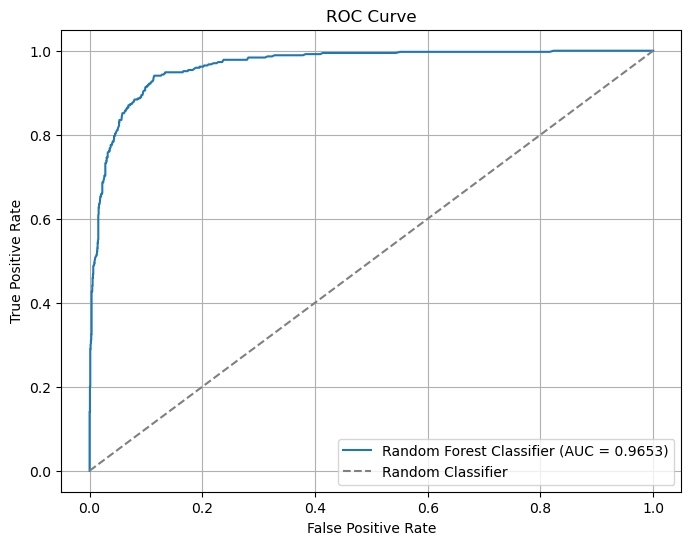

In [89]:
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
auc_models = [
    {
        'labels': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2,
                                        max_depth=25, criterion='gini'),
        'auc': 1.000000  # This will be recalculated
    }
]

# Plot ROC Curve
plt.figure(figsize=(8, 6))

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)  # Train the model
    
    # Get predictions
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)  # Compute AUC score
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{algo['labels']} (AUC = {auc_score:.4f})")

# Labels and title
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()